### This file plots the processed csv files with matplotlib

Note: manually select date and file name in the corresponding section (either cpu, netsend or netrecv)

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [4]:
date = '2018-11-22_18h12'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/' + date + '/'

In [5]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## CPU utilization plot

In [6]:
# read data into pandas dataframe
file_name = 'dstat_server_cpu_sharded_True.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,sharded,cpu_mean,cpu_std
0,12,64,1:1,17.523902,0.481139
1,12,64,1:3,16.971447,0.338202
2,12,64,1:6,11.124187,0.283863
3,12,64,1:9,7.873333,0.383221


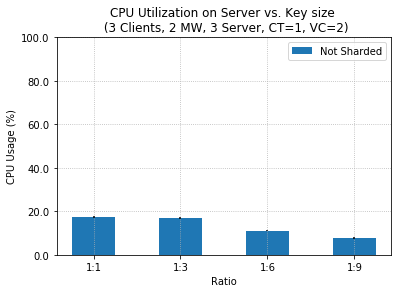

In [7]:
f = plt.figure()
plt.title("CPU Utilization on Server vs. Key size \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")

    
vcs = df_c['sharded']
means = df_c['cpu_mean']
stds = df_c['cpu_std']

#plt.bar()
plt.bar(x = vcs, height = means, yerr = stds, label = 'Not Sharded', width=0.5)

plt.grid(linestyle = "dotted")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Ratio")
#plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=100)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network send activity plot

In [14]:
# read data into pandas dataframe
file_name = 'dstat_server_netsend_sharded_False.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,sharded,netsend_mean,netsend_std
0,12,64,1:1,5.868254e+06,97071.544436
1,12,64,1:3,1.215831e+07,492895.238832
2,12,64,1:6,1.247326e+07,6967.629317
3,12,64,1:9,1.246191e+07,7290.063604


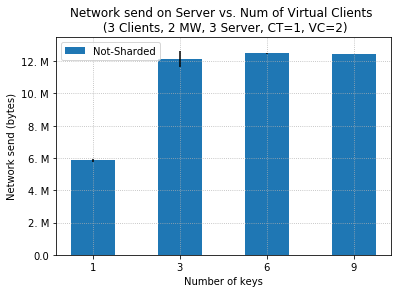

In [15]:
f = plt.figure()
plt.title("Network send on Server vs. Num of Virtual Clients \n (3 Clients, 2 MW, 3 Server, CT=1, VC=2)")

vcs = df_c['sharded']
means = df_c['netsend_mean']
stds = df_c['netsend_std']
    
plt.bar(x = vcs, height = means, yerr = stds, label = 'Not-Sharded', width=0.5)

plt.grid(linestyle = "dotted")
plt.ylabel("Network send (bytes)")
plt.xlabel("Number of keys")
#plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e6+np.max(df_c['netsend_mean']))
plt.legend()

ax = plt.gca()
ax.set_xticklabels(('1', '3', '6', '9'))
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/4_GetsAndMultigets/processed_data/"+date+"/"+file_name[:-4]+".png", dpi = 150)